In [1]:
#importing the dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\shksa\Downloads\IMDB Dataset.csv\IMDB Dataset.csv")

In [36]:
print(df['sentiment'].value_counts())

positive    25000
negative    25000
Name: sentiment, dtype: int64


Pre Processing the Data

In [37]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenize the text
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [word for word in tokens if not word in stop_words]
    # join tokens back to form the text
    text = ' '.join(tokens)
    return text

df['review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['sentiment'].values


TRAIN TEST DATA SPLITTIMG

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='positive'))
print("Recall:", recall_score(y_test, y_pred, pos_label='positive'))
print("F1-Score:", f1_score(y_test, y_pred, pos_label='positive'))


Accuracy: 0.898
Precision: 0.887709820567239
Recall: 0.9130779916650129
F1-Score: 0.900215222070045


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='positive'))
print("Recall:", recall_score(y_test, y_pred, pos_label='positive'))
print("F1-Score:", f1_score(y_test, y_pred, pos_label='positive'))


Accuracy: 0.7256
Precision: 0.732334480664102
Recall: 0.7178011510220281
F1-Score: 0.7249949889757467


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.73      0.73      4961
    positive       0.73      0.72      0.72      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='positive'))
print("Recall:", recall_score(y_test, y_pred, pos_label='positive'))
print("F1-Score:", f1_score(y_test, y_pred, pos_label='positive'))


Accuracy: 0.8699
Precision: 0.8829918032786885
Recall: 0.8551299861083548
F1-Score: 0.8688375844339147


In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



##Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy: 0.7688
Precision: 0.8189473684210526
Recall: 0.6947807104584243
F1-score: 0.7517715267339489


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.84      0.78      4961
    positive       0.82      0.69      0.75      5039

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



##SVC

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
# Train the SVM model
svm = SVC(kernel='linear', C=0.1, random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy: 0.8871
Precision: 0.8673431040962044
Recall: 0.9160547727723755
F1-score: 0.8910336840073352


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.86      0.88      4961
    positive       0.87      0.92      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



##Long Short Term Memory




In [28]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras_preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv('IMDB Dataset.csv')

# Extract features and target variable
X = data['review'].values
y = np.where(data['sentiment'] == 'positive', 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set parameters
max_features = 20000
maxlen = 100
batch_size = 32

# Tokenize words and convert to sequences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Build model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

# Evaluate model
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_classes))

Epoch 1/5
1250/1250 [==============================] - 311s 243ms/step - loss: 0.3897 - accuracy: 0.8219 - val_loss: 0.3609 - val_accuracy: 0.8394
Epoch 2/5
1250/1250 [==============================] - 265s 212ms/step - loss: 0.2344 - accuracy: 0.9068 - val_loss: 0.3348 - val_accuracy: 0.8643
Epoch 3/5
1250/1250 [==============================] - 262s 210ms/step - loss: 0.1620 - accuracy: 0.9387 - val_loss: 0.3872 - val_accuracy: 0.8658
Epoch 4/5
1250/1250 [==============================] - 262s 210ms/step - loss: 0.1115 - accuracy: 0.9595 - val_loss: 0.4603 - val_accuracy: 0.8434
Epoch 5/5
313/313 [==============================] - 11s 34ms/step - loss: 0.5326 - accuracy: 0.8588
Test score: 0.5325550436973572
Test accuracy: 0.8587999939918518
313/313 [==============================] - 10s 30ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5019
           1       0.85      0.87      0.86      4981

    accuracy             

##Convolutional Neural Networks (CNN)

In [45]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Embedding
from keras_preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Load data
data = pd.read_csv('IMDB Dataset.csv')

# Convert labels to binary
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Extract features and target variable
X = data['review'].values
y = data['sentiment'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set parameters
max_features = 20000
maxlen = 1000
batch_size = 32

# Tokenize text
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Build model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

# Evaluate model
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_classes))


Epoch 1/5
1250/1250 [==============================] - 150s 118ms/step - loss: 0.3681 - accuracy: 0.8160 - val_loss: 0.2388 - val_accuracy: 0.9074
Epoch 2/5
1250/1250 [==============================] - 49s 39ms/step - loss: 0.1722 - accuracy: 0.9362 - val_loss: 0.2441 - val_accuracy: 0.9023
Epoch 3/5
1250/1250 [==============================] - 27s 21ms/step - loss: 0.0891 - accuracy: 0.9675 - val_loss: 0.3099 - val_accuracy: 0.8986
Epoch 4/5
1250/1250 [==============================] - 21s 16ms/step - loss: 0.0400 - accuracy: 0.9864 - val_loss: 0.5314 - val_accuracy: 0.8837
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.6003 - accuracy: 0.8902
Test score: 0.600298285484314
Test accuracy: 0.8902000188827515
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      5075
           1       0.86      0.93      0.89      4925

    accuracy                        

##RNN

In [50]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding
from keras_preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv('IMDB Dataset.csv')

# Convert labels to binary
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Extract features and target variable
X = data['review'].values
y = data['sentiment'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set parameters
max_features = 20000
maxlen = 100
batch_size = 32

# Tokenize text
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Build model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

# Evaluate model
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_classes))


Epoch 1/5
1250/1250 [==============================] - 182s 144ms/step - loss: 0.6600 - accuracy: 0.5829 - val_loss: 0.6782 - val_accuracy: 0.6971
Epoch 2/5
1250/1250 [==============================] - 166s 133ms/step - loss: 0.5044 - accuracy: 0.7594 - val_loss: 0.4617 - val_accuracy: 0.8008
Epoch 3/5
1250/1250 [==============================] - 149s 119ms/step - loss: 0.4666 - accuracy: 0.7832 - val_loss: 0.4738 - val_accuracy: 0.7806
Epoch 4/5
1250/1250 [==============================] - 175s 140ms/step - loss: 0.4568 - accuracy: 0.7883 - val_loss: 0.5364 - val_accuracy: 0.7335
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.4286 - accuracy: 0.8148
Test score: 0.4286258816719055
Test accuracy: 0.8148000240325928
313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4968
           1       0.82      0.80      0.81      5032

    accuracy               

# Comparison of Accuracies

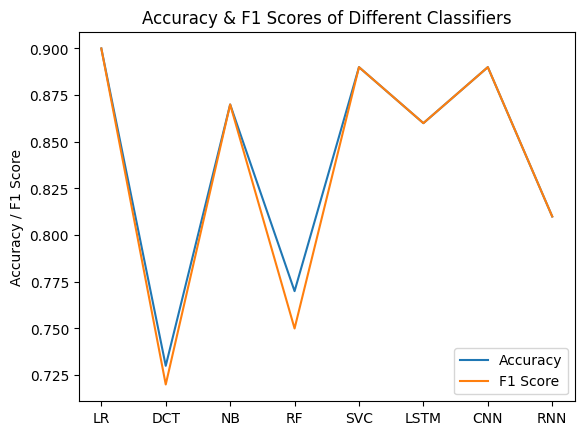

In [64]:
import matplotlib.pyplot as plt

# Define the classifiers and their accuracy scores
classifiers = ['LR', 'DCT', 'NB', 'RF','SVC',  'LSTM','CNN', 'RNN' ]
accuracies = [0.90, 0.73, 0.87, 0.77, 0.89, 0.86, 0.89,0.81]
f1_scores = [0.90,0.72,0.87,0.75,0.89,0.86,0.89,0.81]

# Plot the bar graph
fig, ax = plt.subplots()

# Set the chart title and labels
ax.set_title('Accuracy & F1 Scores of Different Classifiers')
# plot accuracies and F1 scores
ax.plot(classifiers, accuracies, label='Accuracy')
ax.plot(classifiers, f1_scores, label='F1 Score')

# set y-axis label
ax.set_ylabel('Accuracy / F1 Score')

# set legend
ax.legend()

# show plot
plt.show()

